In [1]:
# Import modules
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

Using TensorFlow backend.


In [2]:
# Manage data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(train_x.shape[0], 1, 28, 28)
test_x = test_x.reshape(test_x.shape[0], 1, 28, 28)

train_x = train_x.astype(float)/255
test_x = test_x.astype(float)/255

train_y = np_utils.to_categorical(train_y, 10) 
test_y = np_utils.to_categorical(test_y, 10)

In [32]:
# Create Model
##

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Epoch 1/5
60000/60000 [==============================] - 362s - loss: 0.1778 - acc: 0.9474   
Epoch 2/5
60000/60000 [==============================] - 487s - loss: 0.0567 - acc: 0.9831   
Epoch 3/5
60000/60000 [==============================] - 409s - loss: 0.0376 - acc: 0.9881   
Epoch 4/5
60000/60000 [==============================] - 398s - loss: 0.0288 - acc: 0.9907   
Epoch 5/5
60000/60000 [==============================] - 380s - loss: 0.0208 - acc: 0.9930   


In [33]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 28, 28)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 14, 28)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 14, 28)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 7, 28)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

In [ ]:
# Save model
classifier.save('my_model.h5')

In [3]:
from keras.models import load_model
# Load model
model = load_model('my_model.h5')

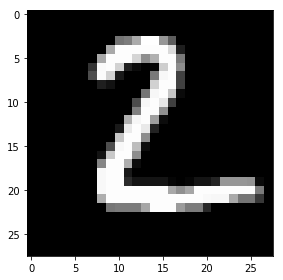

In [4]:
io.imshow(test_x[1][0])
plt.show()

In [132]:
x = model.predict_classes(test_x)
print(x)

10000/10000 [==============================] - 32s    
[7 2 1 ..., 4 5 6]


In [112]:
''' # test print 
t = 10
fig, axis = plt.subplots(nrows=2, ncols=5, figsize=(20,20))
axis = axis.ravel()
for i in range(t):
    axis[i].set_title(x[i])
    axis[i].imshow(test_x[i][0], cmap='gray')
plt.show()
'''

"\nt = 10\nfig, axis = plt.subplots(nrows=2, ncols=5, figsize=(20,20))\naxis = axis.ravel()\nfor i in range(t):\n    axis[i].set_title(x[i])\n    axis[i].imshow(test_x[i][0], cmap='gray')\nplt.show()\n"

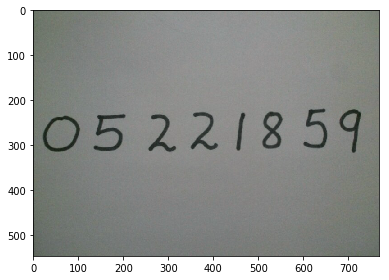

In [141]:
im = cv2.imread("/Users/nutorbitx/Desktop/DigitRecognition/digit.jpg")
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
io.imshow(im)
plt.show()

In [142]:
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
im2, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im2 = im2.astype(float)/255

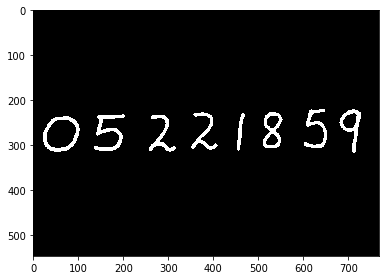

In [143]:
io.imshow(im2)
plt.show()

In [144]:
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

1/1 [==============================] - 0s


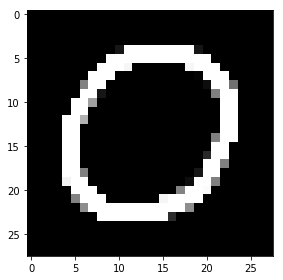

Predict : 0
1/1 [==============================] - 0s


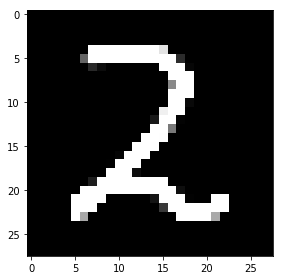

Predict : 2
1/1 [==============================] - 0s


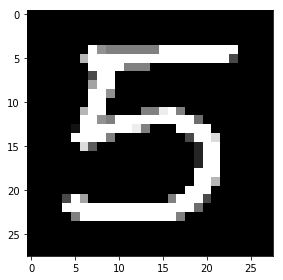

Predict : 5
1/1 [==============================] - 0s


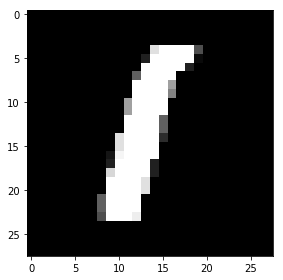

Predict : 1
1/1 [==============================] - 0s


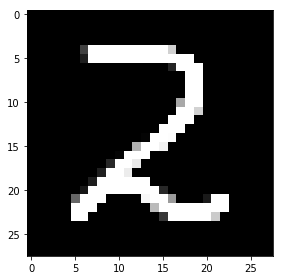

Predict : 2
1/1 [==============================] - 0s


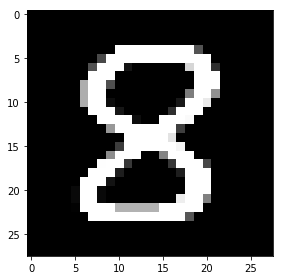

Predict : 8
1/1 [==============================] - 0s


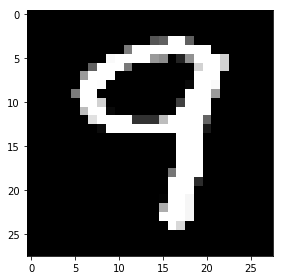

Predict : 9
1/1 [==============================] - 0s


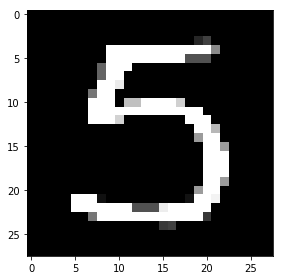

Predict : 5


In [145]:
# Crop digit in image
for (x, y, w, h) in rects:
    im = cv2.rectangle(im, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 5)
    scan = im2[y-15:y+h+15, x-15:x+w+15]
    scan = cv2.resize(scan, (28, 28))
    pred = model.predict_classes(scan.reshape(1, 1, 28, 28))
    io.imshow(scan)
    plt.show()
    print('Predict : ' +str(*pred))
    cv2.putText(im, str(*pred), (x, y), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3) 

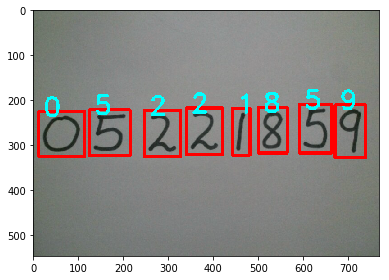

In [146]:
io.imshow(im)
plt.show()

In [168]:
# Template for recognition
def crop(image):
    im = image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
    ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
    im2, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    im2 = im2.astype(float)/255
    rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    for (x, y, w, h) in rects:
        im = cv2.rectangle(im, (x-10, y-10), (x+w+10, y+h+10), (255, 0, 0), 5)
        scan = im2[y-15:y+h+15, x-15:x+w+15]
        scan = cv2.resize(scan, (28, 28))
        pred = model.predict_classes(scan.reshape(1, 1, 28, 28))
        # io.imshow(scan)
        # plt.show()
        # print('Predict : ' +str(*pred))
        cv2.putText(im, str(*pred), (x, y), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3) 
    io.imshow(im)
    plt.show()

In [170]:
x = cv2.imread('')
crop(x)